### Notebook goals:
Simulate the motion of N test masses on a ring by solving 
$$ \delta x^{i} = \delta x_0^{i} + \frac{1}{2}\eta^{ik}h_{kj}\delta x^{j}$$
with
$$ h_{22} = -h_{33} = A_{+}cos(\omega(t-\frac{x}{c}))$$
$$ h_{23} =  h_{32} = A_{\times}cos(\omega(t-\frac{x}{c}))$$
1.  **Sinusoidal wave**\
    1.1  **Plus polarization,  x direction**  : strain as a function of the wave phase\
    1.2  **Cross polarization, x direction** : strain as a function of the wave phase\
2.  **Chirp wave** : strain as a function of the wave phase


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy import constants as cnst

In [10]:
def wave(A, phase):
    return A * np.sin(phase)

In [11]:
def angle(x,y):
    return np.arctan2(x,y)

In [12]:
P       = 4 # Number of phase evolution plots
phases  = np.arange(0,2*np.pi+2*np.pi/P,2*np.pi/P)
d0      = np.array([0,0,0,1])

Initial positions of N test masses on a unit circle

In [13]:
N = 10 # Number of masses
theta = np.arange(0,2*np.pi, 2*np.pi/N)  # Angles for 4 masses
x0 = np.cos(theta)  # X-coordinates
y0 = np.sin(theta)  # Y-coordinates
positions0 = np.vstack((x0, y0))  # Shape (2,4)

Compute new positions and plot

In [14]:
# Function to calculate strain tensor and new positions
def get_positions(h, positions0):
    return positions0 + 0.5 * h @ positions0

In [15]:
# Function to plot each phase
def plot_phase(ax, positions0, positions_new, phi, phase_label):
    ax.scatter(positions0[0], positions0[1], color='blue', label='Initial', zorder=5, alpha=0.6)
    ax.scatter(positions_new[0], positions_new[1], color='orange', label='After GW', zorder=5, alpha=0.6)

    # Plot displacement vectors
    for i in range(len(positions0)):
        ax.plot([positions0[0, i], positions_new[0, i]], 
                [positions0[1, i], positions_new[1, i]], 'k--', lw=0.5)

    # Fit an ellipse to the new red points
    cov = np.cov(positions_new)
    v, w = np.linalg.eigh(cov)  # Eigenvalues and eigenvectors
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # Scale the axes
    angle = np.arctan2(*w[:, 0][::-1])  # Compute angle of rotation

    # Ellipse parameters
    ellipse = Ellipse(xy=np.mean(positions_new, axis=1), width=v[0], height=v[1],
                      angle=np.degrees(angle), color='orange', fill=False, linestyle='-', linewidth=2)
    ax.add_patch(ellipse)
    
    # Plot the reference circle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dotted', linewidth=1.2)
    ax.add_patch(circle)
    
    # Formatting
    ax.set_xlabel("$x$", fontsize=12)
    ax.set_ylabel("$y$", fontsize=12)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.legend(loc='upper left', fontsize=10)
    ax.set_title(f"$T = {phi/(2*np.pi):.2f} \pi$", fontsize=14)
    ax.set_aspect('equal')

<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ricca\AppData\Local\Temp\ipykernel_12324\1348923542.py:32: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title(f"$T = {phi/(2*np.pi):.2f} \pi$", fontsize=14)


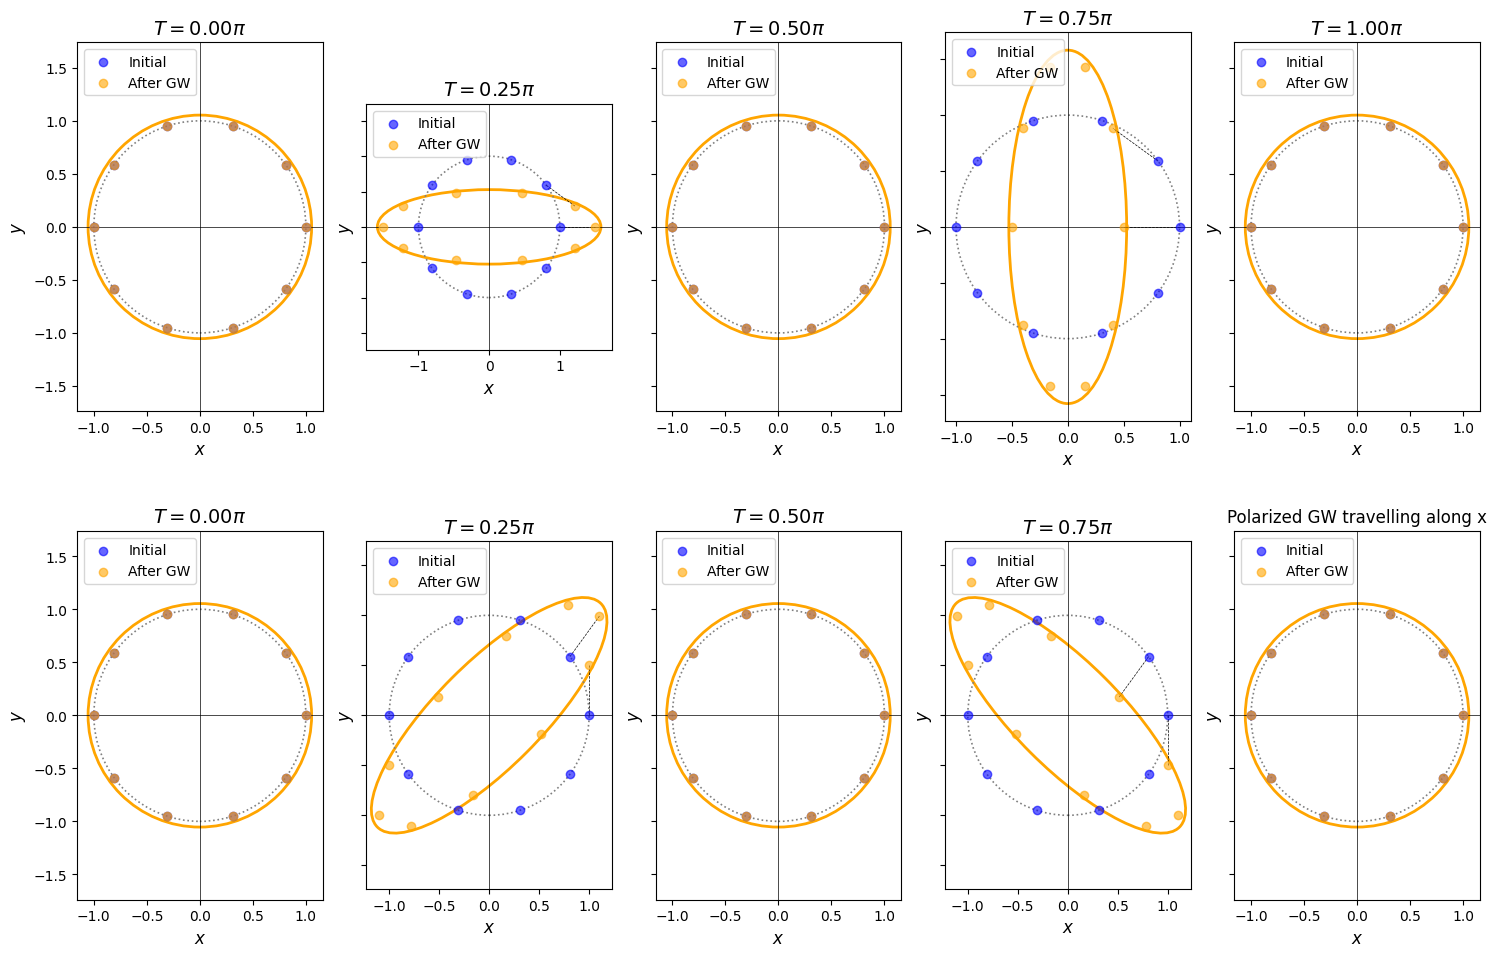

In [16]:
# Create the subplots
fig, axs = plt.subplots(2, P+1, figsize=(15, 10), sharex=False, sharey=True)

# Loop over each polarization (A_plus and A_cross)
for k in range(2):
    if k == 0:
        A_plus, A_cross = 1, 0  # "+" polarization
    else:
        A_plus, A_cross = 0, 1  # "×" polarization
    
    # Loop over each phase value
    for i, phi in enumerate(phases):
        ax = axs[k][i]
        
        # Calculate strain tensor h_ij
        h_22 = wave(A_plus, phi)
        h_33 = -h_22
        h_23 = h_32 = wave(A_cross, phi)

        h = np.array([[h_22, h_23],
                      [h_32, h_33]])

        # Get new positions after applying strain
        positions_new = get_positions(h, positions0)

        # Plot the phase results
        plot_phase(ax, positions0, positions_new, phi, f"Phase {i+1}")

# Adjust layout for better spacing
plt.title("Polarized GW travelling along x")
plt.tight_layout()

Now we should use the link between position, time and phase of the wave
$$ \phi = \omega \left( t - \frac{x}{c} \right) \implies x = c\left(t - \frac{\phi}{\omega}\right)$$ 
Nothing should change...

In [20]:
omega = 1
c = cnst.c*10**2

In [21]:
N = 10 # Number of masses
theta = np.arange(0,2*np.pi+2*np.pi/N, 2*np.pi/N)  # Angles for 4 masses
t = np.arange(0,100+100/N, 100/N)  #
x = c * (t - theta/omega)
x0 = np.cos(omega * (t - x/c))  # X-coordinates
y0 = np.sin(omega * (t - x/c))  # Y-coordinates
positions0 = np.vstack((x0, y0))  # Shape (2,4)

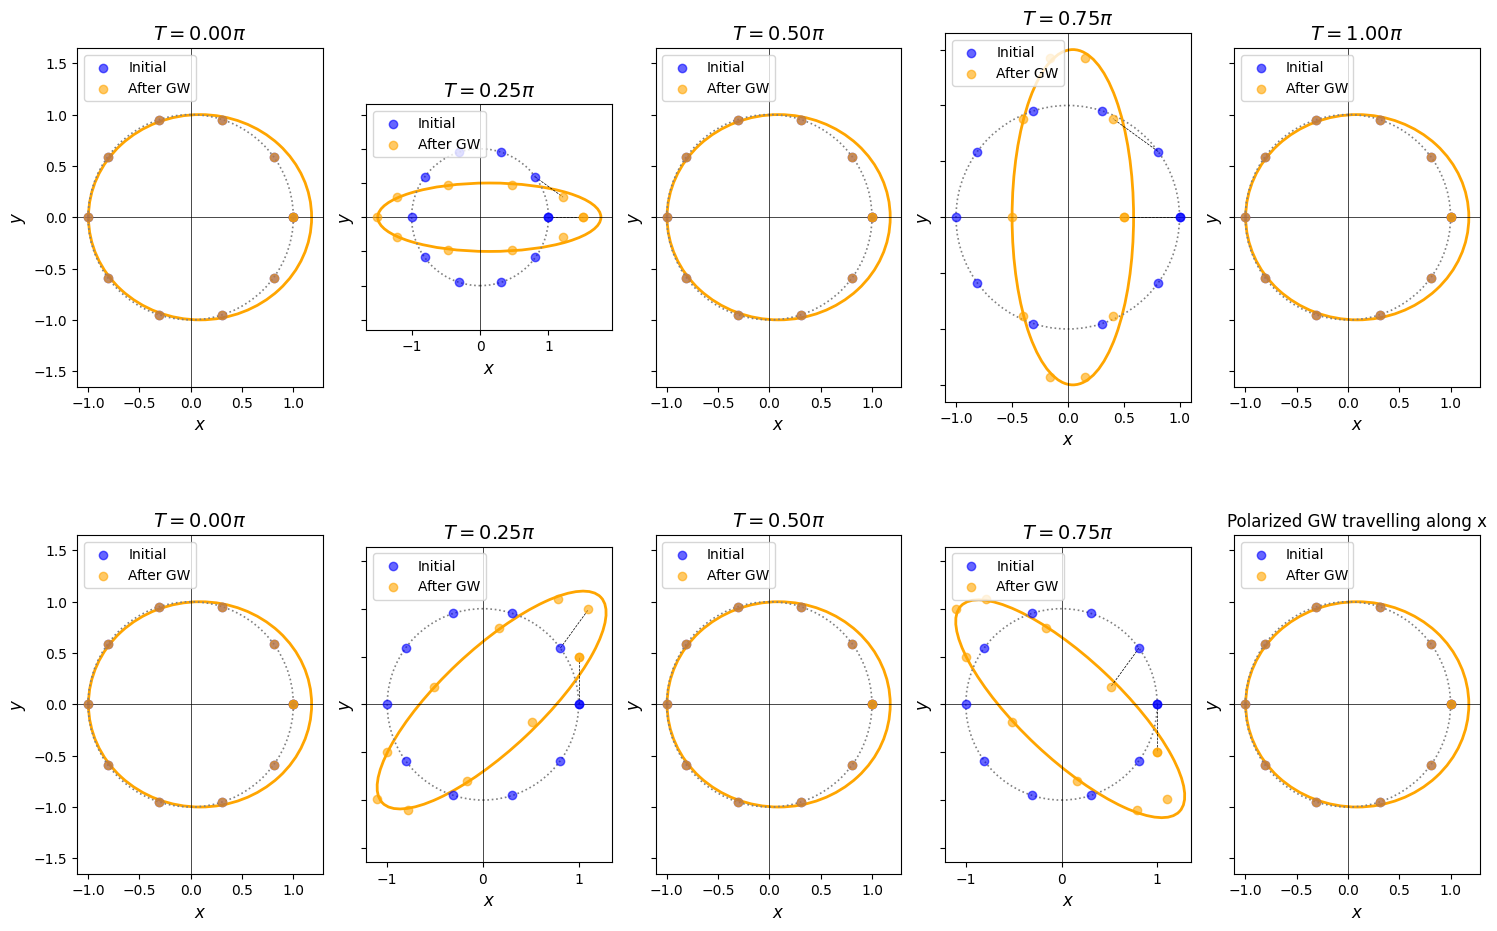

In [ ]:
# Create the subplots
fig, axs = plt.subplots(2, P+1, figsize=(15, 10), sharex=False, sharey=True)

# Loop over each polarization (A_plus and A_cross)
for k in range(2):
    if k == 0:
        A_plus, A_cross = 1, 0  # "+" polarization
    else:
        A_plus, A_cross = 0, 1  # "×" polarization
    
    # Loop over each phase value
    for i, phi in enumerate(phases):
        ax = axs[k][i]
        
        # Calculate strain tensor h_ij
        h_22 = wave(A_plus, phi)
        h_33 = -h_22
        h_23 = h_32 = wave(A_cross, phi)

        h = np.array([[h_22, h_23],
                      [h_32, h_33]])

        # Get new positions after applying strain
        positions_new = get_positions(h, positions0)

        # Plot the phase results
        plot_phase(ax, positions0, positions_new, phi, f"Phase {i+1}")

# Adjust layout for better spacing
plt.tight_layout()